# Plotting Notebook
Please use this is a guide to the type plots that you can create, as examples of the `hist`, `mplhep`, and other packages, as well as the use of the various functions that we have written in `plot_utils.py`. <br>
Use the the Table of Contents in Jupyter to view the different sections of the notebook to help navigating it.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 1

In [3]:
import os, sys, glob, random
import pickle
import math
import multiprocessing
import itertools
import warnings
import json
import time
import numpy as np
from typing import Dict, List
from rich import print
from rich.pretty import pprint
from rich.console import Console
from rich.table import Table
from rich.progress import Progress, track
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from cycler import cycler
import hist
from hist import Hist
import mplhep as hep
from tabulate import tabulate
import scipy
import uproot
import ROOT
from iminuit import Minuit
from iminuit.cost import LeastSquares
from jacobi import propagate
%aimport plot_utils
%aimport plot_utils_extras
%aimport fill_utils
%aimport generic_utils

In [4]:
warnings.filterwarnings('ignore')
mpl.rcParams.update({'figure.max_open_warning': 0})
mpl.rcParams['figure.facecolor'] = 'white'
hep.style.use("CMS")
np.set_printoptions(suppress=True)

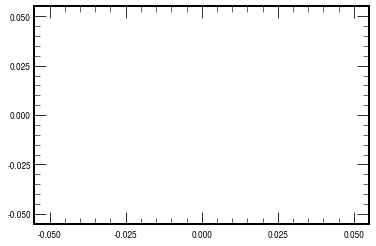

In [5]:
plt.plot()
hep.style.use(hep.style.CMS)

In [6]:
print("The following output directories are available:")
!ls | grep output_histograms

The following output directories are available:

CR_cb_34mu_output_histograms
CR_cb_combine_output_histograms
CR_cb_output_histograms
CR_cb_postDYstudy_output_histograms
CR_light_postDYstudy_output_histograms
CR_prompt_34mu_leading_output_histograms
CR_prompt_34mu_output_histograms
CR_prompt_combine_output_histograms
CR_prompt_dimuon_output_histograms
CR_prompt_dystudy_output_histograms
CR_prompt_leading_output_histograms
CR_prompt_output_histograms
CR_prompt_postDYstudy_output_histograms
DYstudy_2_output_histograms
DYstudy_3_output_histograms
DYstudy_4_output_histograms
DYstudy_5_output_histograms
DYstudy_output_histograms
DYstudy_trigger_match_double_output_histograms
DYstudy_trigger_match_triple_output_histograms
DYstudy_trigger_one_path_output_histograms
fake_rate_output_histograms
kinematics_output_histograms
nbjet_comparison_output_histograms
SR_combine_new_trigger_output_histograms
SR_combine_old_trigger_output_histograms
SR_combine_output_histograms
SR_extrapolation_new_from_mini_output_histograms
SR_extrapolation_new_output_

## Load plots

In [7]:
plots = generic_utils.loader(tag="kinematics")

These are all the samples loaded.

In [8]:
keys = list(plots.keys())
pprint(keys)

[
│   'SUEP_mS125_mPhi1p4_T0p35_modehadronic_2018',
│   'SUEP_mS125_mPhi2_T2_modehadronic_2018',
│   'SUEP_mS125_mPhi8_T32_modehadronic_2018',
│   'QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt_MuEnriched_2018',
│   'QCD_Pt-120To170_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-15To20_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-170To300_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-20To30_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-300To470_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-30To50_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-470To600_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-50To80_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-600To800_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-800To1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-80To120_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-120To170_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-15To20_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-170To300_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-20To30_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-300To470_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-30To50_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-470To600_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-50To80_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-600To800_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-800To1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-80To120_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018'
]

In [9]:
for key in plots['SUEP_mS125_mPhi1p4_T0p35_modehadronic_2018'].keys():
    pprint(f"{key}")

'nMuon'

'b_vetoed_vs_iso_cut_vs_nMuon_vs_nDarkPho_vs_nDarkMeson'

'nJet_vs_nMuon'

'nFatJet_vs_nMuon'

'ht_vs_nMuon'

'tot_muon_charge_vs_nMuon'

In [10]:
def nMuon_func(x, a, b):
    return a * 10 ** (- b * x)

def binomial(n, k, p):
    q = 1 - p
    coeff = math.factorial(n) / (math.factorial(k) * math.factorial(n - k))
    return coeff * (p**k) * (q**(n-k))

def reweight_hist_binomially(h_i, a, p):
    h_f = h_i.copy().reset()
    edges = h_i.axes[0].edges.astype(int)
    for i in range(edges[0], edges[-1]):
        tot_val, tot_var = a * h0[i*1j].value, a * h0[i*1j].variance
        for j in range(edges[0], i+1):
            weight = binomial(i, j, p)
            h_f[j*1j] += hist.accumulators.WeightedSum(weight * tot_val, weight * tot_var)
    return h_f

def reweight_hist_binomially_for_fit(data_x, a, p):
    y_out = np.zeros_like(data_y0)
    for i in range(len(data_x)):
        x_i = data_x[i]
        tot_val = a * data_y0[i]
        for j in range(0, i+1):
            x_j = data_x[j]
            weight = binomial(int(x_i), int(x_j), p)
            y_out[j] += weight * tot_val
    return y_out

def qcd_estimate_plot(iso_cut=15, nMuon_cut=0):
    suffix = "MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018"
    qcd_bins = [
        f'QCD_Pt-15To20_{suffix}',
        f'QCD_Pt-20To30_{suffix}',
        f'QCD_Pt-30To50_{suffix}',
        f'QCD_Pt-50To80_{suffix}',
        f'QCD_Pt-80To120_{suffix}',
        f'QCD_Pt-120To170_{suffix}',
        f'QCD_Pt-170To300_{suffix}',
        f'QCD_Pt-300To470_{suffix}',
        f'QCD_Pt-470To600_{suffix}',
        f'QCD_Pt-600To800_{suffix}',
        f'QCD_Pt-800To1000_{suffix}',
        f'QCD_Pt-1000_{suffix}',
    ]
    h_name = 'b_vetoed_vs_iso_cut_vs_nMuon_vs_nDarkPho_vs_nDarkMeson'
    a_values_fitted = []
    p_values_fitted = []
    for qcd_bin in qcd_bins:
        h0 = plots[qcd_bin][h_name][False, 99.1j, :, ::sum, ::sum]
        h1 = plots[qcd_bin][h_name][False, iso_cut*1.1j, :, ::sum, ::sum]
        
        # Power law fit for hist without iso cut
        data_x = h0.axes[0].edges[:-1]
        data_y = h0.values()
        data_yerr = np.sqrt(h0.variances())
        not_zero = (data_yerr > 0) & (data_y > 0)
        data_x = data_x[not_zero]
        data_y = data_y[not_zero]
        data_yerr = data_yerr[not_zero]
        least_squares = LeastSquares(data_x, data_y, data_yerr, nMuon_func)
        m = Minuit(least_squares, a=1e15, b=1.5)
        m.migrad()
        m.hesse()
        h0_fit = h0.copy().reset()
        x_inference = h0_fit.axes[0].edges[:-1]
        fit_values = nMuon_func(x_inference, m.values["a"], m.values["b"])
        y, ycov = propagate(lambda p: nMuon_func(x_inference, *p), m.values, m.covariance)
        yerr_prop = np.diag(ycov) ** 0.5
        for ii in range(len(fit_values)):
            h0_fit[ii] = (fit_values[ii], yerr_prop[ii]**2)

        
        data_x = h1.axes[0].edges[:-1]
        global data_y0
        data_y0 = h0_fit.values()
        data_y = h1.values()
        data_yerr = np.sqrt(h1.variances())
        not_zero = (data_yerr > 0) & (data_y > 0)
        data_x, data_y0, data_y, data_yerr = (
            data_x[not_zero], data_y0[not_zero], data_y0[not_zero], data_y0[not_zero]
        )
        least_squares = LeastSquares(data_x, data_y, data_yerr, reweight_hist_binomially_for_fit)
        m = Minuit(least_squares, a=1, p=1)
        m.limits = [(0, None), (0, 1)]
        m.migrad()
        m.hesse()
        a_values_fitted.append(m.values["a"])
        p_values_fitted.append(m.values["p"])
    
    print(a_values_fitted)
    print(p_values_fitted)
    
    h2 = plots["QCD_Pt_MuEnriched_2018"][h_name][:, ::sum, ::sum].copy().reset()

    k = 0 
    for a_value, p_value, qcd_bin in zip(a_values_fitted, p_values_fitted, qcd_bins):
        h_i_0 = plots[qcd_bin][h_name][:, ::sum, ::sum]
        
        # Power law fit for hist without iso cut
        data_x = h_i_0.axes[0].edges[:-1]
        data_y = h_i_0.values()
        data_yerr = np.sqrt(h_i_0.variances())
        not_zero = (data_yerr > 0) & (data_y > 0)
        data_x = data_x[not_zero]
        data_y = data_y[not_zero]
        data_yerr = data_yerr[not_zero]
        least_squares = LeastSquares(data_x, data_y, data_yerr, nMuon_func)
        m = Minuit(least_squares, a=1e15, b=1.5)
        m.migrad()
        m.hesse()
        h_i_0_fit = h_i_0.copy().reset()
        x_inference = h_i_0_fit.axes[0].edges[:-1]
        fit_values = nMuon_func(x_inference, m.values["a"], m.values["b"])
        y, ycov = propagate(lambda p: nMuon_func(x_inference, *p), m.values, m.covariance)
        yerr_prop = np.diag(ycov) ** 0.5
        for ii in range(len(fit_values)):
            h_i_0_fit[ii] = (fit_values[ii], yerr_prop[ii]**2)
        
        h_i = h_i_0_fit.copy().reset()
        for i in range(3, 10):
            tot_val, tot_var = a_value * h_i_0_fit[i*1j].value, a_value * h_i_0_fit[i*1j].variance
            for j in range(3, i+1):
                weight = binomial(i, j, p_value)
                h_i[j*1j] += hist.accumulators.WeightedSum(weight * tot_val, weight**2 * tot_var)
        h2 += h_i
    
    return h2

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

hist_name = 'b_vetoed_vs_iso_cut_vs_nMuon_vs_nDarkPho_vs_nDarkMeson'
muon_iso_cut = 15
slc = (False, muon_iso_cut*1.1j, slice(None), slice(None, None, sum), slice(1j, None, sum))
histogram = plots["QCD_Pt_MuEnriched_2018"][hist_name]
h0 = histogram[slc]

data_x = h0.axes[0].edges[:-1]
data_y = h0.values()
data_yerr = np.sqrt(h0.variances())

not_zero = (data_yerr > 0) & (data_y > 0)
data_x = data_x[not_zero]
data_y = data_y[not_zero]
data_yerr = data_yerr[not_zero]

least_squares = LeastSquares(data_x, data_y, data_yerr, nMuon_func)
m = Minuit(least_squares, a=1e15, b=1.5)
m.migrad()
m.hesse()

h1 = hist.Hist.new.Reg(9, 3, 12, name="nMuon", label="fit").Weight()
x_inference = h1.axes[0].edges[:-1]
fit_values = nMuon_func(x_inference, m.values["a"], m.values["b"])
y, ycov = propagate(lambda p: nMuon_func(x_inference, *p), m.values, m.covariance)
yerr_prop = np.diag(ycov) ** 0.5
for ii in range(len(fit_values)):
    h1[ii] = (fit_values[ii], yerr_prop[ii]**2)

for i in range(8, 12):
    print(f"nMuon = {i}: {h1[i*1j].value:.4f} ± {np.sqrt(h1[i*1j].variance):.4f}")

h0.plot(label="MC", yerr=np.sqrt(h0.variances()))
h1.plot(label=r"$a\cdot10^{-b}$ fit", yerr=np.sqrt(h1.variances()))

#h2 = qcd_estimate_plot(iso_cut=muon_iso_cut, nMuon_cut=0)
#h2.plot(label="binomial fit", yerr=np.sqrt(h2.variances()))

plt.yscale('log')
plt.ylim(1e-2, 1e12)
legend1 = plt.legend(title="QCD", loc=3)
ax.add_artist(legend1)

signal_points = [
    "SUEP_mS125_mPhi1p4_T0p35_modehadronic_2018",
    "SUEP_mS125_mPhi2_T2_modehadronic_2018",
    "SUEP_mS125_mPhi8_T32_modehadronic_2018",
]
h_s_arr = []
for s in signal_points:
    h_s = plots[s][hist_name][slc].plot(
        yerr=np.sqrt(plots[s][hist_name][slc].variances()),
        ls="--"
    )
    h_s_arr.append(h_s[0])
plt.legend(
    h_s_arr, 
    [s.replace("_2018", "").replace("mode", "") for s in signal_points], 
    title="Signal",
    loc=1,
)

plt.show()

data_x=array([3., 4., 5., 6., 7.])

[13688416.59936088  1336098.90523524    81469.29949001     3216.76117375
      214.05610682]

[56075.60716057 17519.79312183  4326.78383234   861.2776869
   214.05610682]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 145.1 (χ²/ndof = 48.4)     │              Nfcn = 80               │
│ EDM = 2.31e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  20.6e9   │   0.7e9   │            │            │         │         │       │
│ 1 │ b    │   1.059   │   0.005   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────────┐
│   │                a                b │
├───┼───────────────────────────────────┤
│ a │         4.85e+17 3.249169235409e6 │
│ b │ 3.249169235409e6         2.21e-05 │
└───┴───────────────────────────────────┘

a: 20644284336.024025

b: 1.0587355227470254

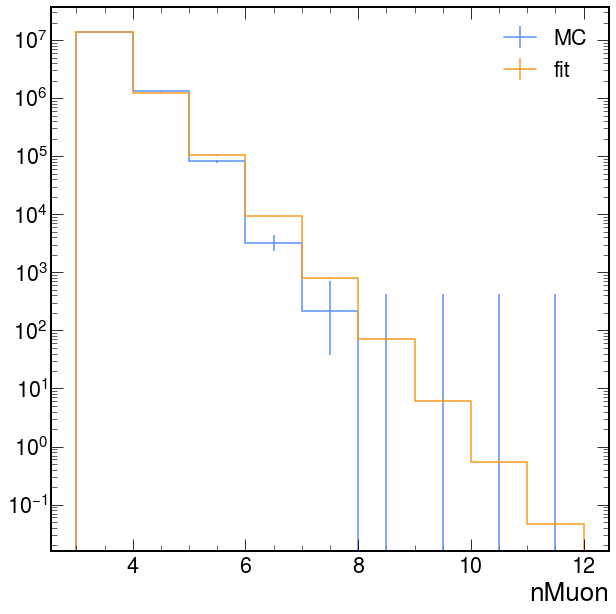

In [29]:
h_name = 'b_vetoed_vs_iso_cut_vs_nMuon_vs_nDarkPho_vs_nDarkMeson'
qcd_bin = "QCD_Pt-300To470_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018"
h0 = plots[qcd_bin][h_name][False, 99.1j, :, ::sum, ::sum]
h1 = plots[qcd_bin][h_name][False, 15.1j, :, ::sum, ::sum]

# Power law fit for hist without iso cut
data_x = h0.axes[0].edges[:-1]
data_y = h0.values()
data_yerr = np.sqrt(h0.variances())
not_zero = (data_yerr > 0) & (data_y > 0)
data_x = data_x[not_zero]
data_y = data_y[not_zero]
data_yerr = data_yerr[not_zero]
print(f"{data_x=}")
print(data_y)
print(data_yerr)
least_squares = LeastSquares(data_x, data_y, data_yerr, nMuon_func)
m = Minuit(least_squares, a=17485763957, b=1.035)
#m.fixed["a"] = True
#m.fixed["b"] = True
m.migrad()
m.hesse()
print(m)
print(f"a: {m.values['a']}")
print(f"b: {m.values['b']}")

h0_fit = h0.copy().reset()
x_inference = h0_fit.axes[0].edges[:-1]
fit_values = nMuon_func(x_inference, m.values["a"], m.values["b"])
y, ycov = propagate(lambda p: nMuon_func(x_inference, *p), m.values, m.covariance)
yerr_prop = np.diag(ycov) ** 0.5
for ii in range(len(fit_values)):
    h0_fit[ii] = (fit_values[ii], yerr_prop[ii]**2)

h0.plot(label="MC")
h0_fit.plot(label="fit")
plt.yscale('log')
plt.legend()
plt.show()

# data_x = h1.axes[0].edges[:-1]
# global data_y0
# data_y0 = h0_fit.values()
# data_y = h1.values()
# data_yerr = np.sqrt(h1.variances())
# not_zero = (data_yerr > 0) & (data_y > 0)
# data_x, data_y0, data_y, data_yerr = (
#     data_x[not_zero], data_y0[not_zero], data_y0[not_zero], data_y0[not_zero]
# )
# least_squares = LeastSquares(data_x, data_y, data_yerr, reweight_hist_binomially_for_fit)
# m = Minuit(least_squares, a=1, p=1)
# m.limits = [(0, None), (0, 1)]
# m.migrad()
# m.hesse()
# print(m.values["a"], m.values["p"])

In [11]:
def log_nMuon_func(x, loga, b):
    return loga - b * x

In [34]:
def binomial(k, n, p):
    q = 1 - p
    coeff = math.factorial(n) / (math.factorial(k) * math.factorial(n - k))
    return coeff * (p**k) * (q**(n-k))

def nMuon_func(x, a, b):
    return a * 10**(-b * x)

def ultimate_func(x, a, b, p):
    y_out = np.zeros_like(x)
    for k, x_k in enumerate(x):
        for x_n in x[x >= x_k]:
            y_out[k] += binomial(int(x_k), int(x_n), p) * a * 10**(-b * x_n)
    return y_out

Processing QCD_Pt-600To800_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018 bin

[221020.84820378   9141.2110901     378.07171887     15.63664061
      0.6466784       0.02672218      0.00109462      0.0000421
      0.00000116]

[416883.83496     48441.89312745   3368.5795932     156.53238581
      8.055778        0.              0.              0.
      0.        ]

[221020.84820378   9141.2110901     378.07171887     15.63664061
      0.6466784       0.02672218      0.00109462      0.0000421
      0.00000116]

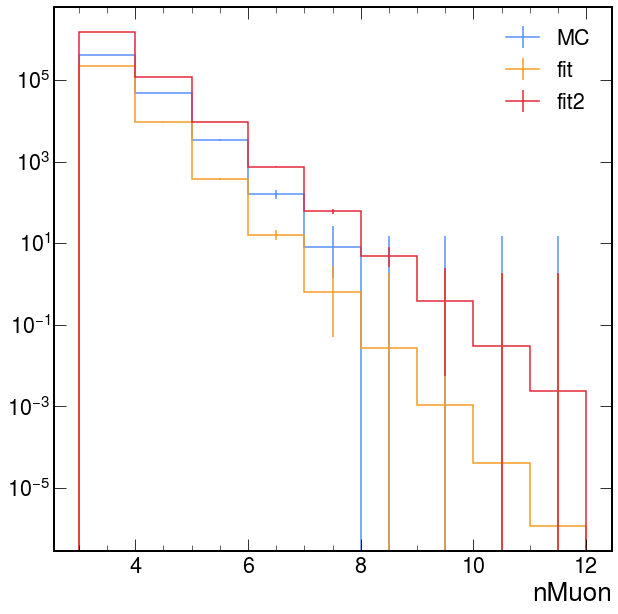

In [38]:
suffix = "MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018"
qcd_bins = [
#     f'QCD_Pt-15To20_{suffix}',
#     f'QCD_Pt-20To30_{suffix}',
#     f'QCD_Pt-30To50_{suffix}',
#     f'QCD_Pt-50To80_{suffix}',
#     f'QCD_Pt-80To120_{suffix}',
#     f'QCD_Pt-120To170_{suffix}',
#     f'QCD_Pt-170To300_{suffix}',
#     f'QCD_Pt-300To470_{suffix}',
#     f'QCD_Pt-470To600_{suffix}',
    f'QCD_Pt-600To800_{suffix}',
#     f'QCD_Pt-800To1000_{suffix}',
#     f'QCD_Pt-1000_{suffix}',
]
h_name = 'b_vetoed_vs_iso_cut_vs_nMuon_vs_nDarkPho_vs_nDarkMeson'
for qcd_bin in qcd_bins:
    print(f"Processing {qcd_bin} bin")
    h_name = 'b_vetoed_vs_iso_cut_vs_nMuon_vs_nDarkPho_vs_nDarkMeson'
    # qcd_bin = "QCD_Pt-300To470_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018"
    h0 = plots[qcd_bin][h_name][False, 99.1j, :, ::sum, ::sum]

    # Power law fit for hist without iso cut
    data_x = h0.axes[0].edges[:-1]
    data_y = h0.values()
    data_yerr = np.sqrt(h0.variances())
    not_zero = (data_yerr > 0) & (data_y > 0)
    data_x = data_x[not_zero]
    data_y = data_y[not_zero]
    data_yerr = data_yerr[not_zero]

    #data_logy = np.log10(data_y)
    #data_logyerr = data_yerr / (data_y * np.log(10))

    #print(data_x)
    #print(data_y)
    #print(data_yerr)
    #print(data_logy)
    #print(data_logyerr)
    least_squares = LeastSquares(data_x, data_y, data_yerr, ultimate_func)
    m = Minuit(least_squares, a=3e9, b=1.1, p=0.5)
    m.limits["a"] = (0, None)
    m.limits["b"] = (0, None)
    m.limits["p"] = (0, 1)
    m.fixed["a"] = True
    m.fixed["b"] = True
    m.fixed["p"] = True
    m.migrad()
    m.hesse()
    # print(m)

    h0_fit = h0.copy().reset()
    x_inference = h0_fit.axes[0].edges[:-1]
    y = ultimate_func(x_inference, m.values["a"], m.values["b"], m.values["p"])
    print(y)
    # y, ycov = propagate(lambda p: ultimate_func(x_inference, *p), m.values, m.covariance)
    # yerr_prop = np.diag(logycov) ** 0.5

    #print(f"a: {10**m.values['loga']}")
    #print(f"b: {m.values['b']}")

    #y = 10 ** logy
    #yerr_prop = np.log(10) * (10 ** logy) * logyerr_prop

    for ii in range(len(y)):
        h0_fit[ii] = (y[ii], y[ii]) #yerr_prop[ii]**2)
    
    ########################################################
    least_squares = LeastSquares(data_x, data_y, data_yerr, nMuon_func)
    m = Minuit(least_squares, a=3e9, b=1.1)
    m.limits["a"] = (0, None)
    m.limits["b"] = (0, None)
    m.fixed["a"] = True
    m.fixed["b"] = True
    m.migrad()
    m.hesse()

    h0_fit2 = h0.copy().reset()
    x_inference = h0_fit2.axes[0].edges[:-1]
    y = nMuon_func(x_inference, m.values["a"], m.values["b"])

    for ii in range(len(y)):
        h0_fit2[ii] = (y[ii], y[ii]) #yerr_prop[ii]**2)
    ########################################################
    

    print(h0.values())
    print(h0_fit.values())
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    h0.plot(label="MC", ax=ax)
    h0_fit.plot(label="fit", ax=ax)
    h0_fit2.plot(label="fit2", ax=ax)
    ax.set_yscale('log')
    #ax.set_ylim(1e-1, 1e12)
    ax.legend()
    plt.show()

In [ ]:
ultimate_func(np.array([3., 4., 5., 6., 7., 8., 9.]), 1, 1, 1)

dtype('float64')